In [31]:
import calendar
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import scipy as sp

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [32]:
max_temp=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
#calendar.month_name[1:]

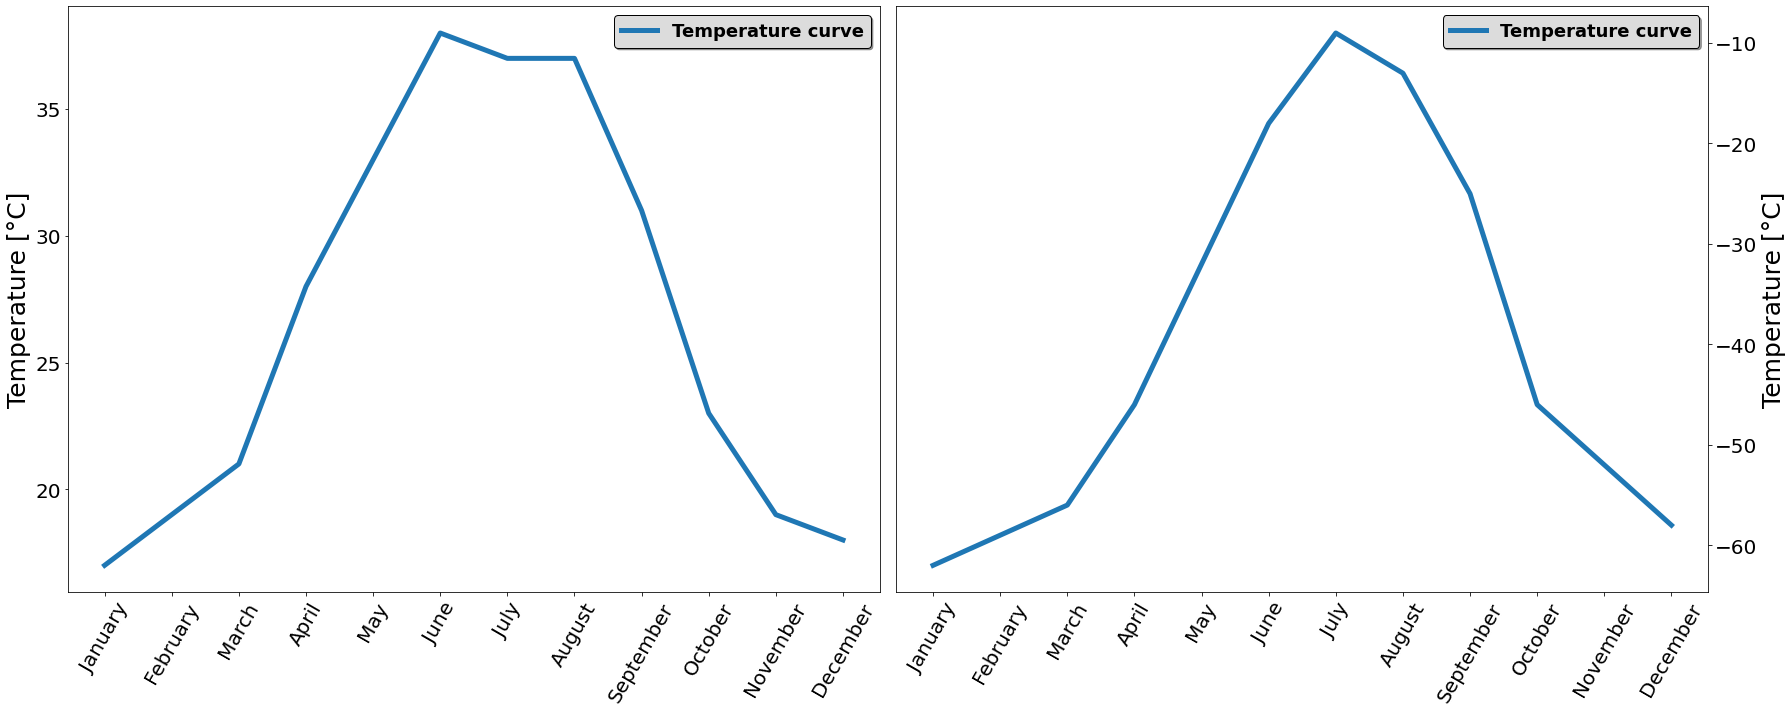

In [33]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(25, 10))
ax[0].plot(calendar.month_name[1:], max_temp, label='Temperature curve', linewidth=5)
ax[0].set_ylabel('Temperature [°C]', fontsize=25)
ax[0].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18})
ax[1].plot(calendar.month_name[1:], min_temp, label='Temperature curve', linewidth=5)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel('Temperature [°C]', fontsize=25)
ax[1].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18})
fig.tight_layout()

In [34]:
x_data=(np.arange(0,12))
x_axis=np.linspace(0, 11, 100)

In [35]:
def f_max(t, amplitude, omega, phi, offset):
    return amplitude * np.sin(omega * (t - phi)) + offset
popt_max, pcov_max = sp.optimize.curve_fit(f_max, x_data, max_temp, p0=[6, np.pi/12, 0, 17])

In [36]:
def f_min(t, amplitude, omega, phi, offset):
    return amplitude * np.sin(omega * (t - phi)) + offset
popt_min, pcov_min = sp.optimize.curve_fit(f_min, x_data, min_temp, p0=[6, np.pi/12, 1, -60])

In [63]:
def f_gauss_max(x, A, mu, offset, sigma):
    return A*np.exp(-(1/2)*(((x-mu)/sigma)**2)) + offset
popt_gauss_max, pcov_gauss_max = sp.optimize.curve_fit(f_gauss_max, x_data, max_temp, p0=[37, 7, 18, 3])
#print(popt)
#print(pcov)

In [67]:
def f_gauss_min(x, A, mu, offset, sigma):
    return A*np.exp(-(1/2)*(((x-mu)/sigma)**2)) + offset
popt_gauss_min, pcov_gauss_min = sp.optimize.curve_fit(f_gauss_min, x_data, min_temp, p0=[50, 7, -60, 3])
#print(popt)
#print(pcov)
print(popt_gauss_min)

[ 52.64929191   6.16452585 -61.32093582   1.97590009]


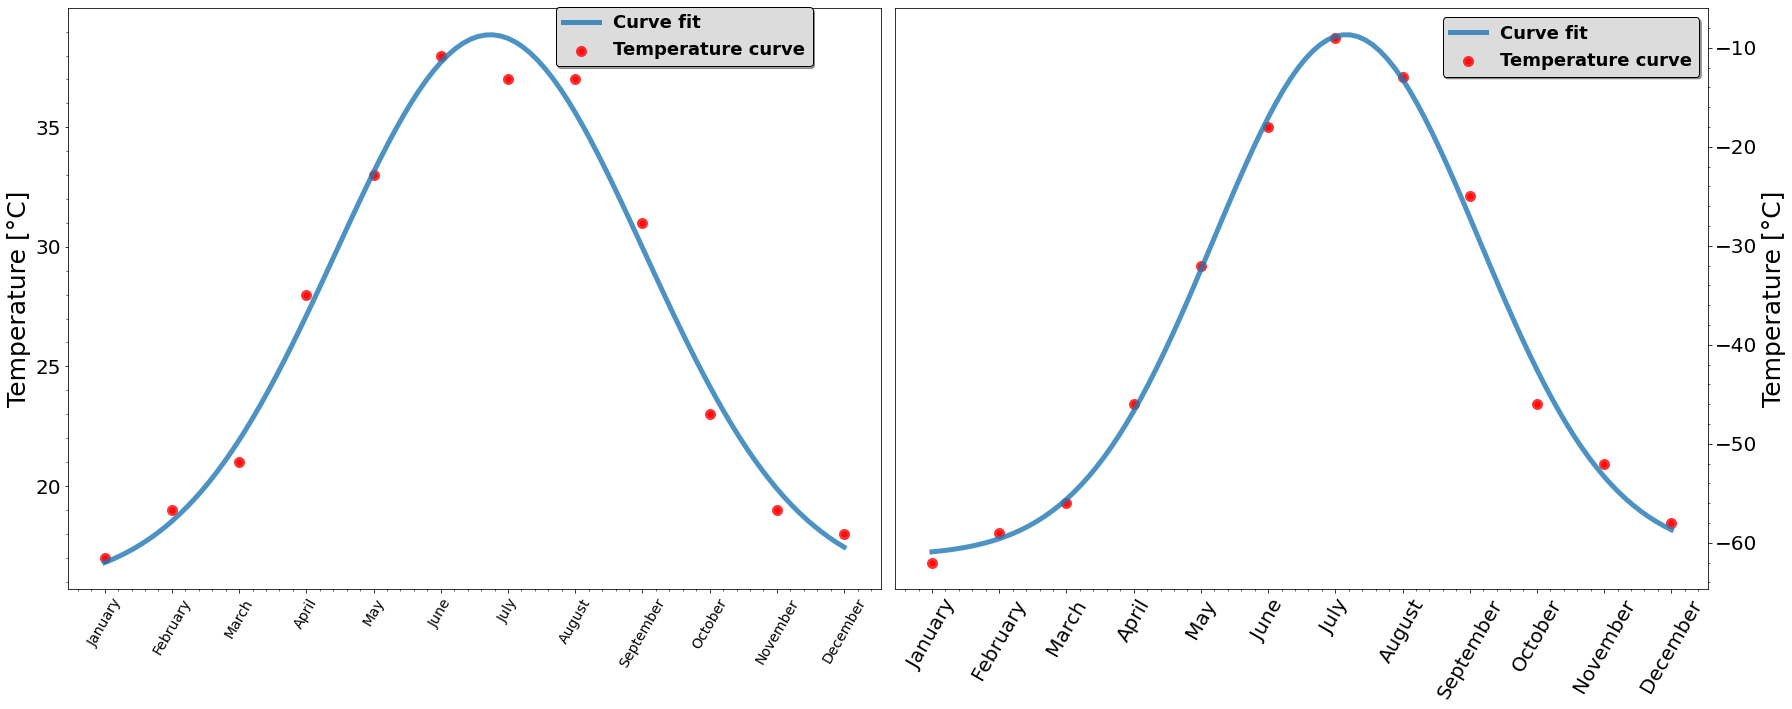

In [58]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(25, 10))
ax[0].scatter(calendar.month_name[1:], max_temp, label='Temperature curve', linewidth=5, alpha=0.8, color='red')
ax[0].plot(x_axis, f_gauss_max((x_axis), *popt_gauss_max), linewidth=5, alpha=0.8, label='Curve fit')
ax[0].set_ylabel('Temperature [°C]', fontsize=25)
ax[0].tick_params(axis='x', which='major', labelsize=14, rotation=60)
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18},loc=[0.6,0.9])
ax[0].minorticks_on()


ax[1].scatter(calendar.month_name[1:], min_temp, label='Temperature curve', linewidth=5, alpha=0.8, color='red')
ax[1].plot(x_axis,f_gauss_min(x_axis, *popt_gauss_min), label='Curve fit', linewidth=5, alpha=0.8)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel('Temperature [°C]', fontsize=25)
ax[1].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].minorticks_on()
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18})
fig.tight_layout()




In [48]:
# Gauss max r
residuals = max_temp- f_gauss_max(x_data, *popt_gauss_max)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((max_temp-np.mean(max_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print(r)

0.99291470320281


In [50]:
# Gauss min r
residuals = min_temp- f_gauss_min(x_data, *popt_gauss_min)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((min_temp-np.mean(min_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print(r)

0.9972984476272483


In [51]:
# Sine max r
residuals = max_temp- f_max(x_data, *popt_max)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((max_temp-np.mean(max_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print(r)

0.9941077622912879


In [52]:
# Sine min r
residuals = min_temp- f_min(x_data, *popt_min)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((min_temp-np.mean(min_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print(r)

0.9893029235548497


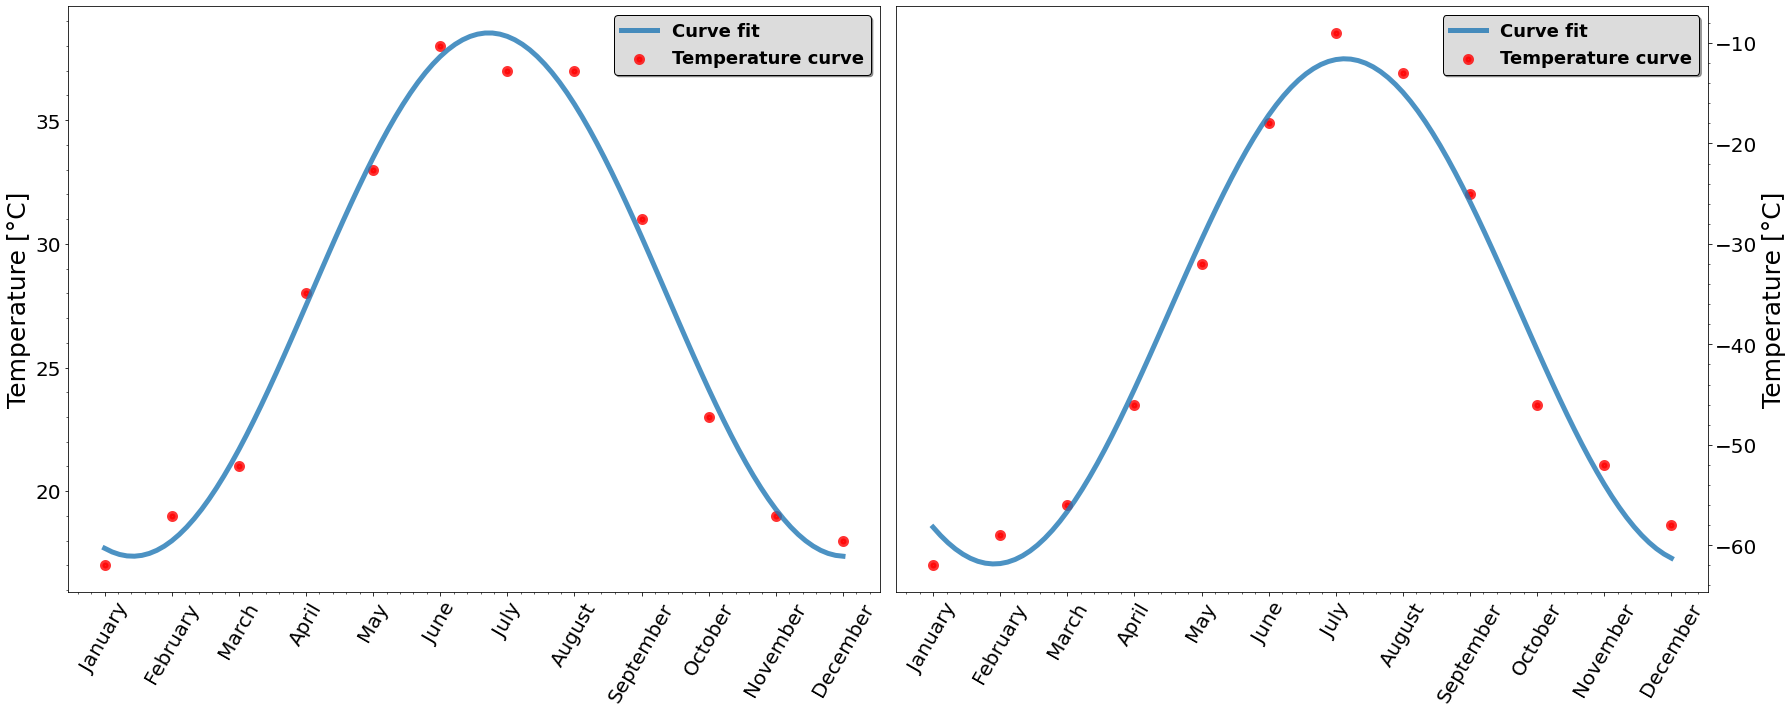

In [55]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(25, 10))
ax[0].scatter(calendar.month_name[1:], max_temp, label='Temperature curve', linewidth=5, alpha=0.8, color='red')
ax[0].plot(x_axis, f_max(x_axis, *popt_max), linewidth=5, alpha=0.8, label='Curve fit')
ax[0].set_ylabel('Temperature [°C]', fontsize=25)
ax[0].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].minorticks_on()
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18})
ax[1].scatter(calendar.month_name[1:], min_temp, label='Temperature curve', linewidth=5, alpha=0.8, color='red')
ax[1].plot(x_axis,f_min(x_axis, *popt_min), label='Curve fit', linewidth=5, alpha=0.8)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel('Temperature [°C]', fontsize=25)
ax[1].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].minorticks_on()
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18})
fig.tight_layout()

In [41]:
#def f(x, mu, sigma):
#    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*(((x-mu)/sigma)**2))
#popt, pcov = sp.optimize.curve_fit(f, x_data, max_temp, p0=[7, 2])
#print(popt)
#print(pcov)

In [75]:
#Compatibility gaussians 
comp_gaus = abs((popt_gauss_max[1]-popt_gauss_min[1]))/(np.sqrt(pcov_gauss_max[1, 1]+pcov_gauss_min[1, 1]))
print(comp_gaus)

4.638122132895186


In [64]:
print(pcov_gauss_max[1, 1])

[[ 1.32868083e+00 -1.60425889e-03 -1.08341694e+00  1.01481323e-01]
 [-1.60425889e-03  6.31514504e-03  1.91650573e-03 -2.12235582e-04]
 [-1.08341694e+00  1.91650573e-03  1.38434572e+00 -1.70936422e-01]
 [ 1.01481323e-01 -2.12235582e-04 -1.70936422e-01  2.75442705e-02]]


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.